In [8]:
# Load the dataset
data = pd.read_csv('heart_disease_uci_formatted_and_cleaned.csv')

# Data Preprocessing
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67.0,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67.0,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41.0,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


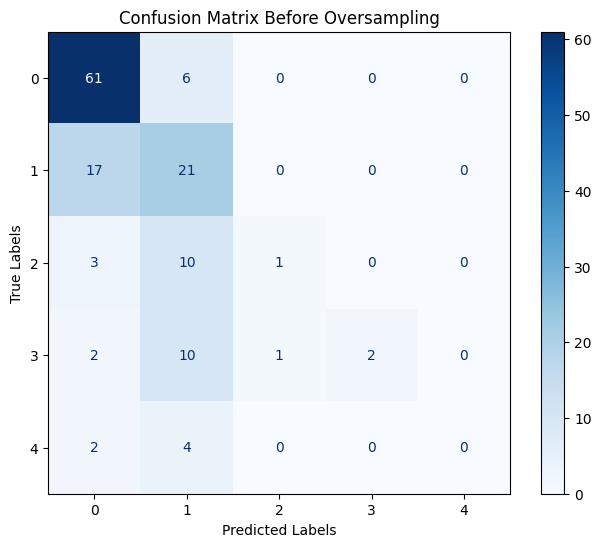

Classification Report Before Oversampling:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80        67
           1       0.41      0.55      0.47        38
           2       0.50      0.07      0.12        14
           3       1.00      0.13      0.24        15
           4       0.00      0.00      0.00         6

    accuracy                           0.61       140
   macro avg       0.53      0.33      0.33       140
weighted avg       0.61      0.61      0.55       140

Accuracy Before Oversampling: 0.6071


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Load and preprocess the dataset
data = pd.read_csv('heart_disease_uci_formatted_and_cleaned.csv')

# Normalize the `age` column
data['age'] = (data['age'] - data['age'].min()) / (data['age'].max() - data['age'].min())

# Map 'sex', 'fbs', and 'exang' to 0 and 1
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})
data['fbs'] = data['fbs'].astype(int)
data['exang'] = data['exang'].astype(int)

# Standardize selected columns
scaler = StandardScaler()
columns_to_standardize = ['thalch', 'oldpeak', 'trestbps', 'chol']
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Label encode the 'slope' column
le = LabelEncoder()
data['slope'] = le.fit_transform(data['slope'])

# One-hot encoding for 'cp', 'restecg', and 'thal'
cp_encoded = pd.get_dummies(data['cp'], prefix='cp')
restecg_encoded = pd.get_dummies(data['restecg'], prefix='restecg')
thal_encoded = pd.get_dummies(data['thal'], prefix='thal')

# Concatenate one-hot encoded columns and drop the originals
data = pd.concat([data.drop(columns=['thal', 'cp', 'restecg']), thal_encoded, cp_encoded, restecg_encoded], axis=1)

# Move the 'num' column to the last position
data = data[[col for col in data.columns if col != 'num'] + ['num']]

# Define inputs (X) and output (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(set(y)))
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix Before Oversampling")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.grid(False)
plt.show()

# Print the classification report and accuracy
print("Classification Report Before Oversampling:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Before Oversampling: {accuracy_score(y_test, y_pred):.4f}")


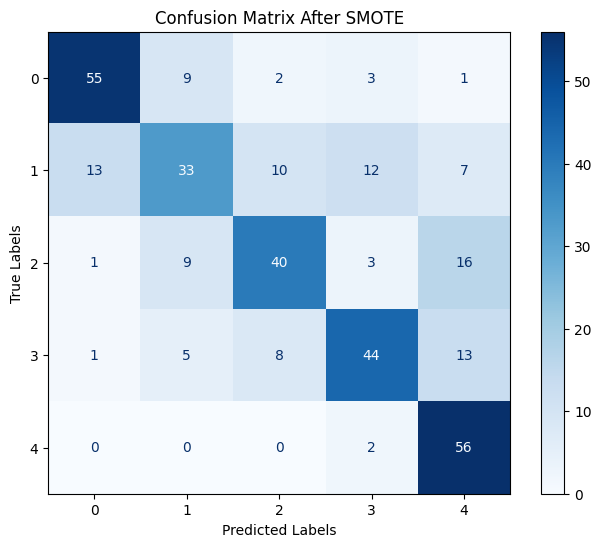

Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        70
           1       0.59      0.44      0.50        75
           2       0.67      0.58      0.62        69
           3       0.69      0.62      0.65        71
           4       0.60      0.97      0.74        58

    accuracy                           0.66       343
   macro avg       0.67      0.68      0.66       343
weighted avg       0.67      0.66      0.66       343

Accuracy After SMOTE: 0.6647


In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.20, random_state=42
)

# Train the K-NN classifier on the resampled data
knn_resampled = KNeighborsClassifier(n_neighbors=19)
knn_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = knn_resampled.predict(X_test_resampled)

# Calculate the confusion matrix
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_resampled, display_labels=sorted(set(y_resampled)))
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix After SMOTE")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.grid(False)
plt.show()

# Print the classification report and accuracy
print("Classification Report After SMOTE:")
print(classification_report(y_test_resampled, y_pred_resampled))
print(f"Accuracy After SMOTE: {accuracy_score(y_test_resampled, y_pred_resampled):.4f}")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
